In [12]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy


sc.set_figure_params(figsize=(4, 4))
sc.settings.figdir = './figures_germcells/'

In [49]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))


palette = ['#fbbc04', '#199de5', '#cfe6d5']

# Germcell plots

### Read in dataset

In [14]:
path_to_gonads = '/nfs/team292/lg18/with_valentina/gonadsV2_revision/'

In [15]:
adata = sc.read(path_to_gonads + 'FCA-gonads_germcellsClean_annotated.h5ad')

In [16]:
adata.obs['celltype'].values.describe()

,counts,freqs
categories,,
PGC,3764,0.342400
GC_mitotic,510,0.046393
GC,485,0.044119
oogonia_STRA8,2203,0.200400
oogonia_meiotic,1875,0.170563
pre_oocyte,812,0.073865
oocyte,723,0.065769
pre_spermatogonia,621,0.056490


In [17]:
adata = adata[[i not in ['lowQC', 'Doublet', 'cont'] for i in adata.obs.lineage]]
adata = adata[[i not in ['lowQC', 'Doublet', 'cont'] for i in adata.obs.celltype]]
adata = adata[[not i for i in adata.obs.is_doublet]]

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


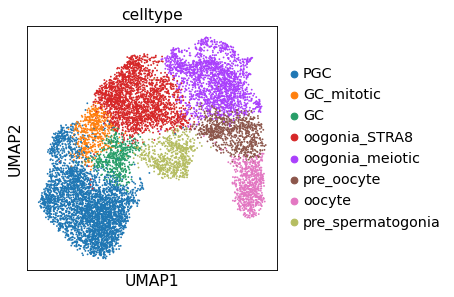

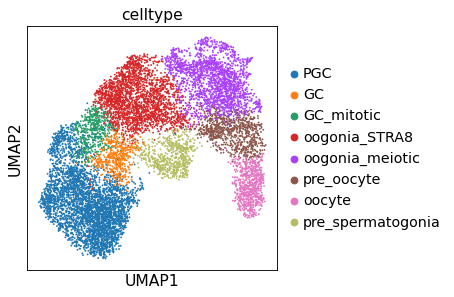

In [18]:
sc.pl.umap(adata, color=['celltype'])
adata.obs['celltype'].cat.reorder_categories(['PGC', 'GC','GC_mitotic',  
                                              'oogonia_STRA8', 
                                              'oogonia_meiotic','pre_oocyte', 'oocyte', 
                                             'pre_spermatogonia'], inplace=True)
sc.pl.umap(adata, color=['celltype'])

In [19]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))

Total number of cells: 10993
Total number of genes: 24744


In [20]:
colorsGen_df = pd.read_csv('gonads_general_colors.csv',index_col=0)
colorsGen_df
idx = [colorsGen_df.index.tolist().index(i) for i in adata.obs['lineage'].cat.categories.tolist() ]
adata.uns['lineage_colors'] = [ colorsGen_df.color[i] for i in idx ]

colorsSom_df = pd.read_csv('gonads_germ_colors.csv',index_col=0)
colorsSom_df
idx = [colorsSom_df.index.tolist().index(i) for i in adata.obs['celltype'].cat.categories.tolist() ]
adata.uns['celltype_colors'] = [ colorsSom_df.color[i] for i in idx ]


Trying to set attribute `.uns` of view, copying.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


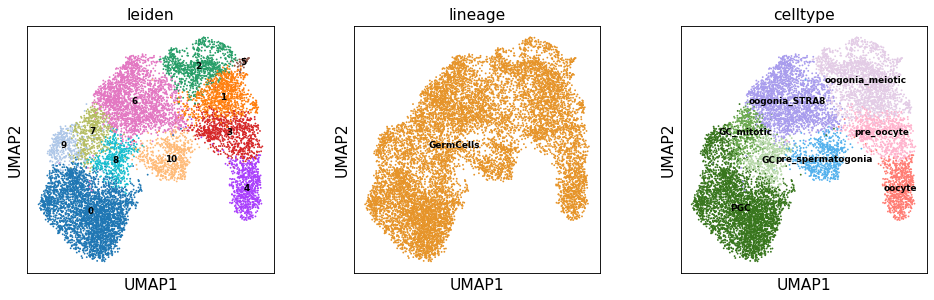

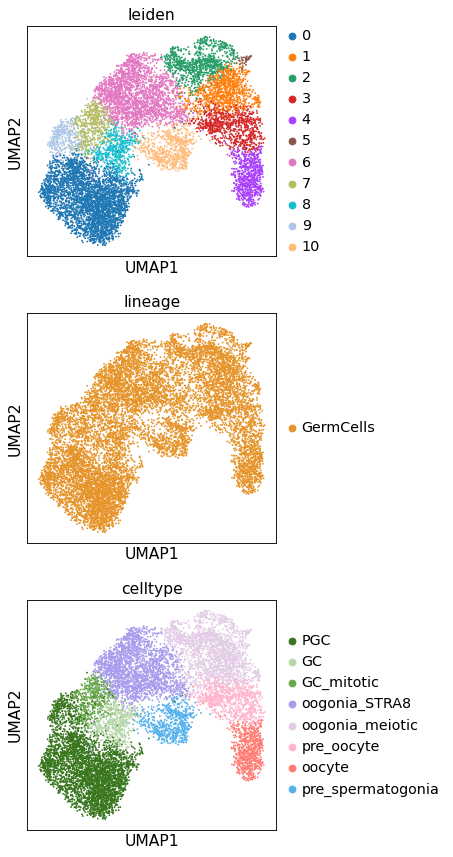

In [21]:
# plt.rcParams['figure.figsize'] = (4,4)
sc.pl.umap(adata, color=['leiden', 'lineage', 'celltype'], legend_loc='on data', legend_fontsize=8, save='_human_germcells_labelsON.pdf')


with plt.rc_context({'figure.figsize': (3.5, 4)}):
    sc.pl.umap(adata, color=['leiden', 'lineage', 'celltype'], ncols=1, save='_human_germcells_legend.pdf')

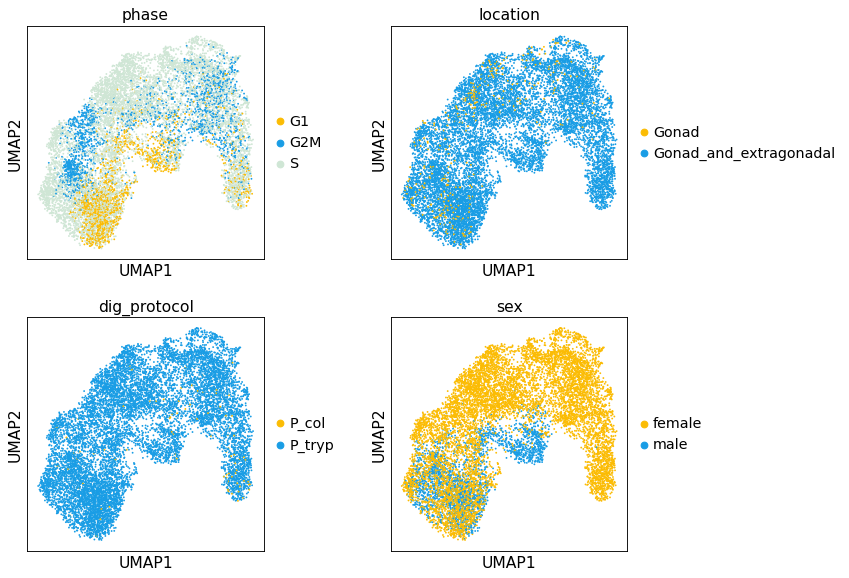

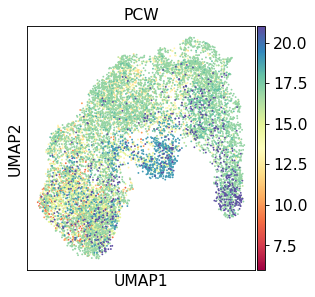

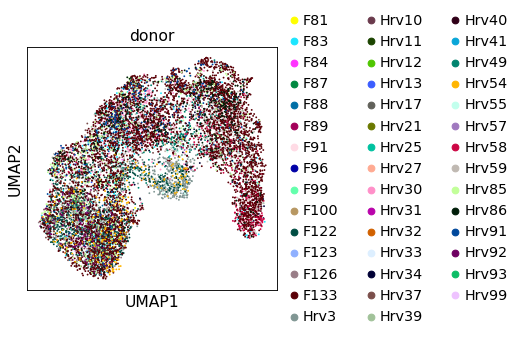

In [50]:
with plt.rc_context({'figure.figsize': (3.5, 4)}):
    sc.pl.umap(
    adata,
    color=['phase', 'location',  'dig_protocol', 'sex'], palette=palette,
    frameon=True, ncols = 2, wspace = 0.4, save='_germcell_metadata_I.pdf'
)
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        adata,
        color=["PCW"], cmap='Spectral',
        frameon=True, ncols = 2, wspace = 0.3, save='germcell_metadata_II.pdf'
    )
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        adata,
        color=["donor"],
        frameon=True, ncols = 2, wspace = 0.3, save='germcell_metadata_III.pdf'
    )

# Quick explore

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


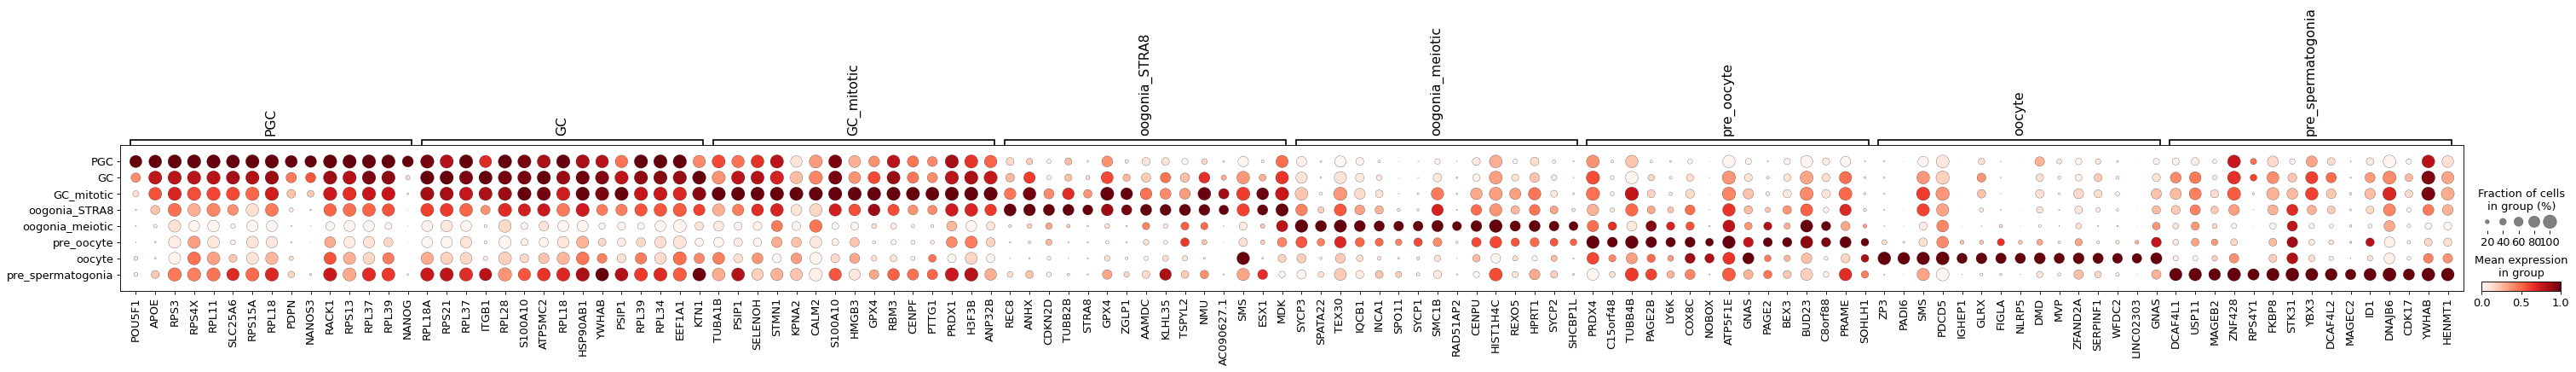

In [22]:
sc.tl.rank_genes_groups(adata, groupby='celltype', use_raw=False) #, method='logreg'
sc.pl.rank_genes_groups_dotplot(adata, n_genes=15, dendrogram=False, use_raw = False, standard_scale = 'var')

In [23]:
adata.uns['celltype_colors']

['#38761d',
 '#b6d7a8',
 '#6aa84f',
 '#a89ced',
 '#e3cce6',
 '#ffb3cd',
 '#ff7c73',
 '#53b1ed']

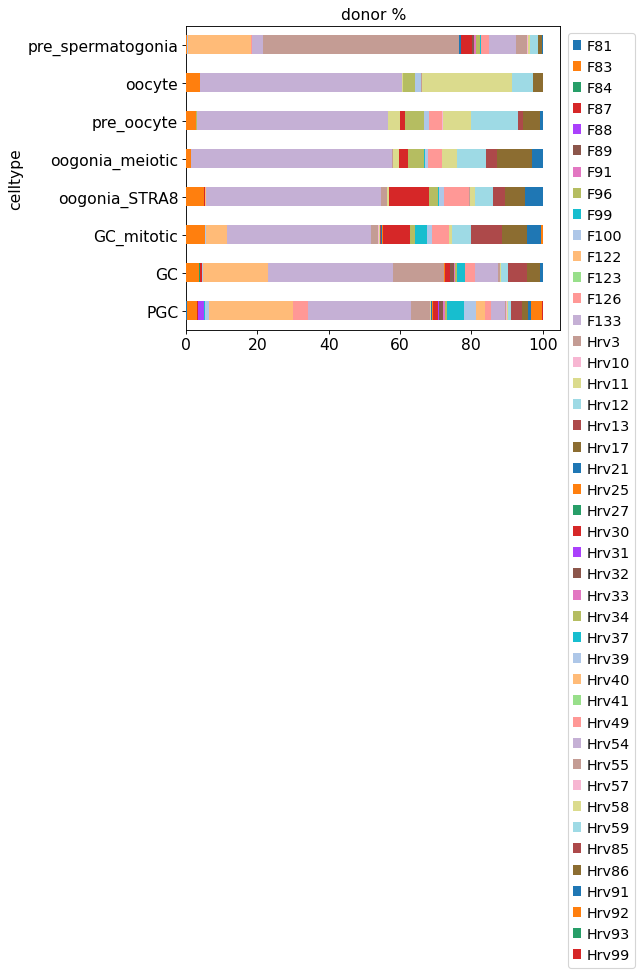

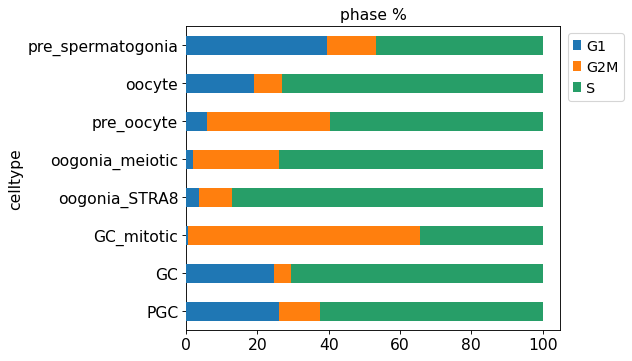

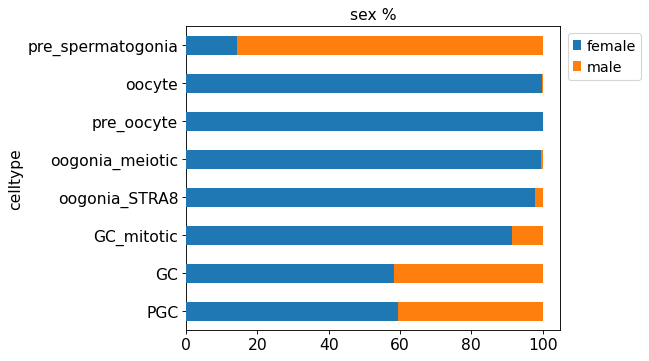

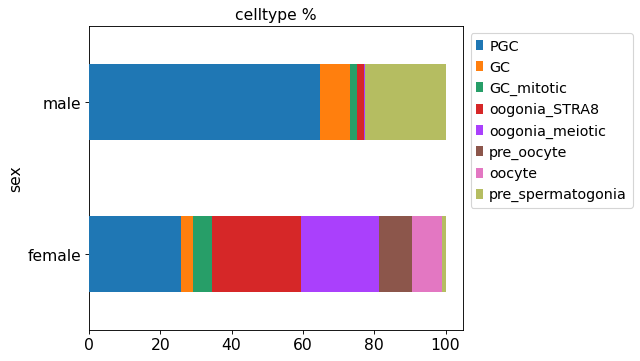

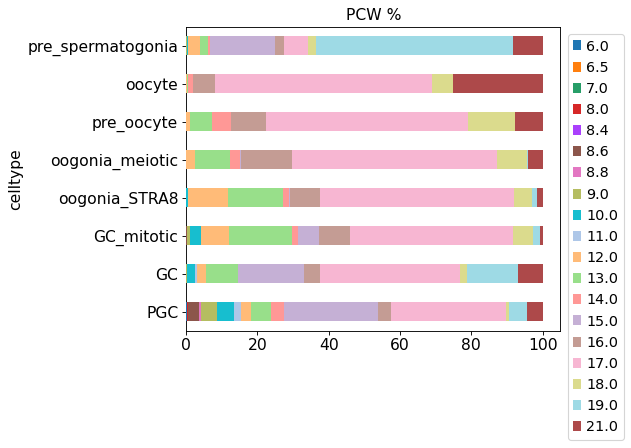

In [24]:
Barplot('donor', adata, var='celltype', height=5)
Barplot('phase', adata, var='celltype', height=5)
Barplot('sex', adata, var='celltype', height=5)
Barplot('celltype', adata, var='sex', height=5)
Barplot('PCW', adata, var='celltype', height=5)

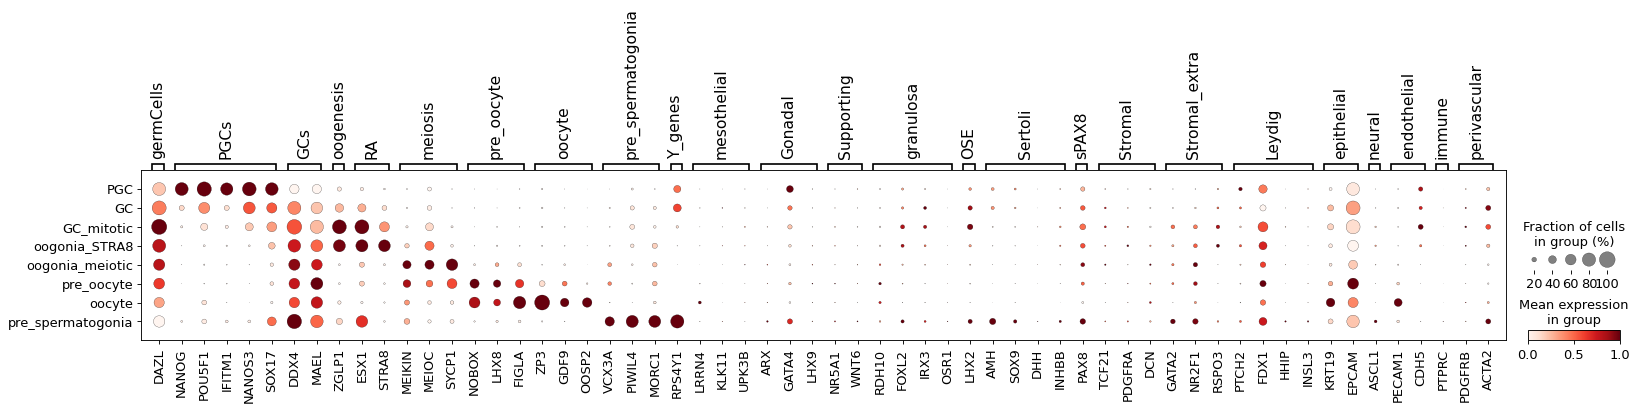

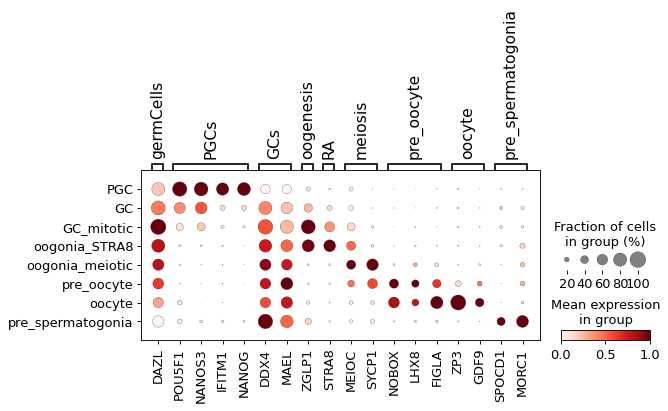

In [25]:
marker_genes = {
    'germCells':{'DAZL'},
    'PGCs': {'POU5F1', 'NANOG', 'NANOS3', 'SOX17', 'IFITM1'},
    'GCs': { 'DDX4', 'MAEL'},
    'oogenesis': {'ZGLP1'}, 
    'RA': {'STRA8', 'ESX1'}, 
    'meiosis': {'MEIKIN', 'SYCP1', 'MEIOC'}, 
    'pre_oocyte': {'FIGLA',  'NOBOX', 'LHX8'},
    'oocyte': {'OOSP2', 'GDF9', 'ZP3'},
    'pre_spermatogonia':{'MORC1', 'PIWIL4', 'VCX3A'},
    'Y_genes': {"RPS4Y1"},
#     'cycling': {'CDK1', 'MKI67'}, 
    'mesothelial': {'LRRN4', 'UPK3B', 'KLK11'},
    'Gonadal':{'LHX9', 'GATA4', 'ARX'},
    'Supporting':{"WNT6", 'NR5A1'},
     'granulosa':{'OSR1', 'FOXL2', "IRX3", "RDH10"},
    'OSE':{'LHX2'},
    'Sertoli': {'SOX9', 'INHBB', 'DHH', 'AMH'},
    'sPAX8': {'PAX8'},
    'Stromal':{'DCN', 'PDGFRA', 'TCF21'},
    'Stromal_extra':{'NR2F1', 'GATA2', 'RSPO3'},
#     'Stromal_gond':{'GATA4', 'ARX'},
    'Leydig':{'INSL3', 'HHIP', 'PTCH2', 'FDX1'},
    'epithelial': {"EPCAM", "KRT19"},
    'neural': {'ASCL1'},
    'endothelial': {'PECAM1', 'CDH5'},
    'immune': {'PTPRC'},
    'perivascular': {"PDGFRB", 'ACTA2'}
}
marker_short = {
    'germCells':{'DAZL'},
    'PGCs': {'POU5F1', 'NANOG', 'NANOS3', 'IFITM1'},
    'GCs': { 'DDX4', 'MAEL'},
    'oogenesis': {'ZGLP1'}, 
    'RA': {'STRA8'}, 
    'meiosis': {'SYCP1', 'MEIOC'}, 
    'pre_oocyte': {'FIGLA',  'NOBOX', 'LHX8'},
    'oocyte': {'GDF9', 'ZP3'},
    'pre_spermatogonia':{'MORC1',  'SPOCD1'}
}
sc.pl.dotplot(adata, marker_genes, groupby='celltype', standard_scale = 'var')
sc.pl.dotplot(adata, marker_short, groupby='celltype', standard_scale = 'var', save='_human_germcellmarkers.pdf')

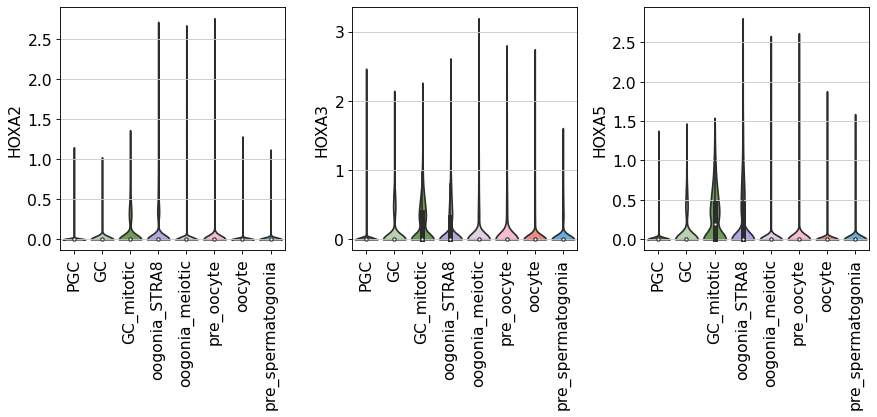

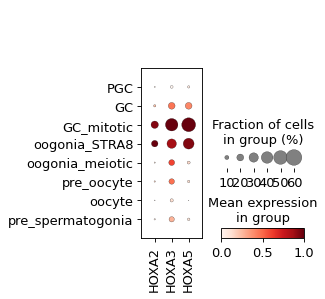

In [26]:
sc.pl.violin(adata, ['HOXA2','HOXA3','HOXA5'], groupby='celltype', rotation=90, stripplot=False, inner='box')
sc.pl.dotplot(adata, ['HOXA2','HOXA3','HOXA5'], groupby='celltype', standard_scale = 'var')

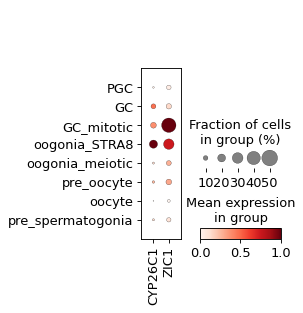

In [27]:
sc.pl.dotplot(adata, [ 'CYP26C1', 'ZIC1'], groupby='celltype', standard_scale = 'var')


In [28]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [29]:
df = adata.obs
mycolors =  adata.uns['celltype_colors']

In [30]:
%%R -i df -i mycolors

library(ggplot2)
df$time_range = '6'
df$time_range[ df$PCW >= 7 ] = '7-8'
df$time_range[ df$PCW >= 9 ] = '9-10'
df$time_range[ df$PCW >= 11 ] = '11-12'
df$time_range[ df$PCW >= 13 ] = '13-14'
df$time_range[ df$PCW >= 15 ] = '15-16'
df$time_range[ df$PCW > 18 ] = '17-21'
df$time_range = factor(df$time_range, levels = c('6', '7-8', '9-10', '11-12', '13-14','15-16', '18-21') )
# df$sex = as.character(df$sex)
# df$sex[ df$PCW < 7 ] = 'bipotent'
# df$sex = factor(df$sex, levels = c('bipotent', 'male', 'female') )


idx = df$celltype == 'pre_spermatogonia' & df$sex == 'female'
df = subset(df, ! idx )
idx = df$celltype == 'oogonia_STRA8' & df$sex == 'male'
df = subset(df, ! idx )

ggplot(df, aes(x=time_range, fill = celltype) ) + 
    scale_fill_manual(values = mycolors) +
    facet_wrap(~sex)+
    geom_bar(position = 'fill')+
    theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ylab('% cells')+
    xlab('PCW')
ggsave(filename = paste0('figures_germcells/barplot_celltype_per_sex_fine_highres.pdf'), dpi = 300, width = 6.5, height = 4.5)
ggplot(df, aes(x=time_range, fill = celltype) ) + 
    scale_fill_manual(values = mycolors) +
    geom_bar(position = 'fill')+
    theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ylab('% cells')+
    xlab('PCW')
ggsave(filename = paste0('figures_germcells/barplot_celltype_fine_highres.pdf'), dpi = 300, width = 5, height = 4.5)



df$time_range = '6-7'
df$time_range[ df$PCW >= 8 ] = '8-10'
df$time_range[ df$PCW >= 11 ] = '11-13'
df$time_range[ df$PCW >= 14 ] = '14-16'
df$time_range[ df$PCW >17 ] = '18-21'
df$time_range = factor(df$time_range, levels = c('6-7', '8-10', '11-13', '14-16', '18-21') )

ggplot(df, aes(x=time_range, fill = celltype) ) + 
    scale_fill_manual(values = mycolors) +
    facet_wrap(~sex)+
    geom_bar(position = 'fill')+
    theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ylab('% cells')+
    xlab('PCW')
ggsave(filename = paste0('figures_germcells/barplot_celltype_per_sex.pdf'), dpi = 300, width = 5.5, height = 4.5)
ggplot(df, aes(x=time_range, fill = celltype) ) + 
    scale_fill_manual(values = mycolors) +
    geom_bar(position = 'fill')+
    theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ylab('% cells')+
    xlab('PCW')
ggsave(filename = paste0('figures_germcells/barplot_celltype.pdf'), dpi = 300, width = 4.5, height = 4.5)

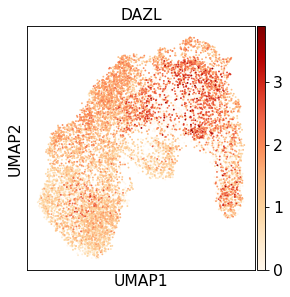

In [31]:
sc.pl.umap(
    adata,
    color=[ 'DAZL'], color_map = "OrRd",
    frameon=True, ncols = 4, wspace = 0.2
)

In [33]:
adata.obs['PCW'].value_counts()

17.0    4857
15.0    1235
13.0     929
16.0     791
19.0     652
21.0     610
18.0     502
12.0     480
14.0     302
10.0     220
9.0      179
8.6      124
11.0      79
8.8       14
8.0        8
6.0        6
7.0        2
8.4        2
6.5        1
Name: PCW, dtype: int64

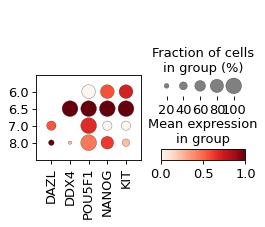

In [44]:
x = adata[[float(i) <=8 for i in adata.obs.PCW]]
sc.pl.dotplot(x[['PGC' in i for i in x.obs.celltype]], [ 'DAZL', 'DDX4', 'POU5F1', 'NANOG', 'KIT'], groupby='stage', standard_scale = 'var')


# PLOTS for reviewer

In [45]:
adata.obs['donor'].values.describe()

,counts,freqs
categories,,
F81,13,0.001183
F83,339,0.030838
F84,3,0.000273
F87,12,0.001092
F88,59,0.005367
F89,2,0.000182
F91,1,0.000091
F96,3,0.000273
F99,11,0.001001


In [46]:
target_cells = 50

adata.obs['cell'] = adata.obs.index
adata.obs['donor_fake'] = [ '--'+str(i)+'--' for i in adata.obs['donor'].tolist() ] # this is ensure perfect match
adata.obs['donor_fake'] = adata.obs['donor_fake'].astype('category')
#adata.obs['sex_celltype'] = adata.obs.apply(lambda x: '_'.join(x[[ 'celltype', 'sex']]),axis=1)

adatas = [adata[adata.obs['donor_fake'].isin([cl])] for cl in adata.obs['donor_fake'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
         sc.pp.subsample(dat, n_obs=target_cells, random_state=0)

adata_downsampled = adatas[0].concatenate(*adatas[1:])

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'sample' as categorical
... storing 'donor' as categorical
... storing 'stage' as categorical
... storing 'study' as categorical
... storing 'batch_collection' as categorical
... storing '10xKit' as categorical
... storing 'dig_protocol' as categorical
... storing 'lineage_v2' as categorical
... storing 'trimester' as categorical
... storing 'leiden' as categorical
... storing 'leiden_R' as categorical
... storing 'donor_fake' as categorical


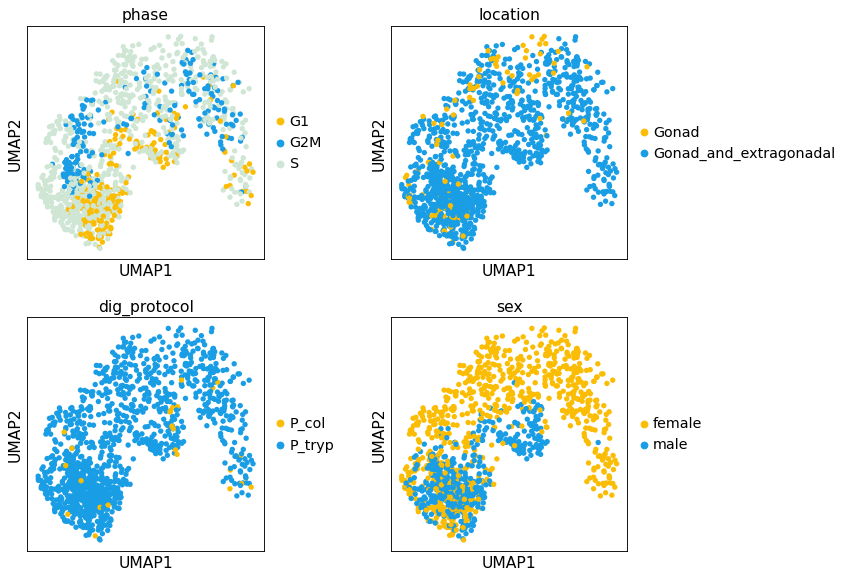

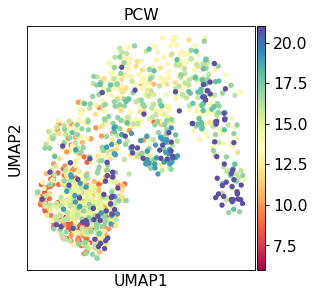

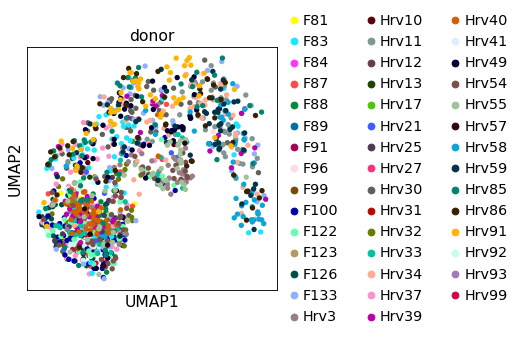

In [58]:
X_last = adata_downsampled[[ float(i) > 12 for i in adata_downsampled.obs.PCW ]]
X_first = adata_downsampled[[  float(i) <= 12  for i in adata_downsampled.obs.PCW ]]
X_resorted = X_first.concatenate(X_last)


with plt.rc_context({'figure.figsize': (3.5, 4)}):
    sc.pl.umap(
    X_resorted,
    color=['phase', 'location',  'dig_protocol', 'sex'], palette=palette,
    frameon=True, ncols = 2, wspace = 0.4, save='_germcell_downsamples_metadata_I.pdf'
)
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        X_resorted,
        color=["PCW"], cmap='Spectral',
        frameon=True, ncols = 2, wspace = 0.3, save='germcell_downsamples_metadata_II.pdf'
    )
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        X_resorted,
        color=["donor"],
        frameon=True, ncols = 2, wspace = 0.3, save='germcell_downsamples_metadata_III.pdf'
    )